In [89]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [128]:
IMAGE_SIZE = 256
BATCH_SIZE = 10
CHANNELS=3
EPOCHS=45

In [91]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "SkinDisease" ,
    shuffle=True,
    image_size =(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 644 files belonging to 2 classes.


In [92]:
class_names = dataset.class_names
class_names

['Hair Loss Photos Alopecia and other Hair Diseases',
 'Herpes HPV and other STDs Photos']

In [93]:
len(dataset)

65

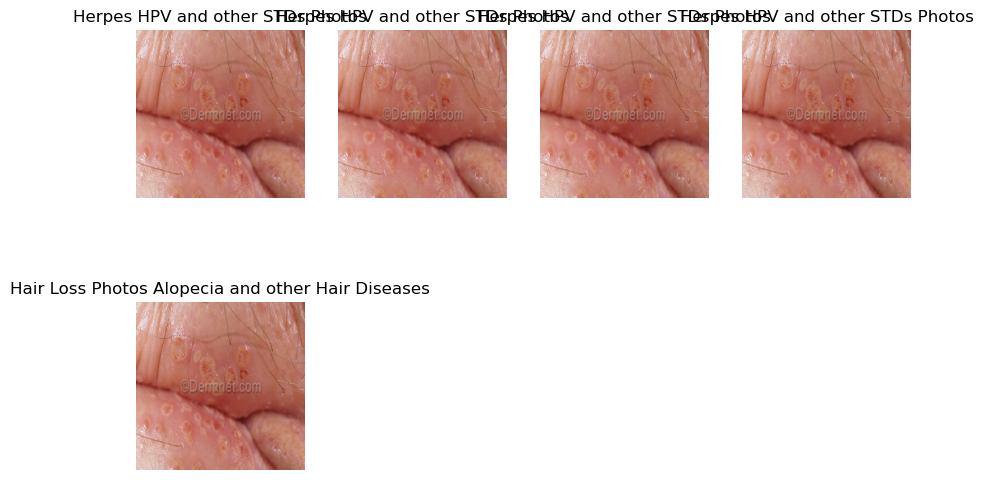

In [94]:
#image dimension
plt.figure(figsize=(10,10))
for image_batch ,label_batch in dataset.take(1):
    for i in range(5):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
    
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [95]:
len(dataset)

65

In [96]:
train_size=0.8
len(dataset)*train_size

52.0

In [97]:
train_ds=dataset.take(52)
len(train_ds)

52

In [98]:
#datset remainning after 54
test_ds=dataset.skip(52)
len(test_ds)

13

In [99]:
val_size=0.1
len(dataset)*val_size

6.5

In [100]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [101]:
test_ds=test_ds.skip(6)

len(test_ds)

7

In [102]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=5000):
    ds_size=len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    train_size = int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds =ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [103]:
train_ds,val_ds,test_ds =get_dataset_partitions_tf(dataset)

In [104]:
len(train_ds)

52

In [105]:
len(val_ds)

6

In [106]:
len(test_ds)

7

In [107]:
train_ds = train_ds.cache().shuffle(400).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(400).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(400).prefetch(buffer_size=tf.data.AUTOTUNE)

In [108]:
#resize image if it is not not in the dimension
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [109]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [110]:
input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 2
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape =  input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [111]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (10, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (10, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (10, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (10, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (10, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (10, 62, 62, 64)          0         
 g2D)                                                 

In [112]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [129]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/45
52/52 [==============================] - 1s 20ms/step - loss: 0.0843 - accuracy: 0.9572 - val_loss: 0.6509 - val_accuracy: 0.9500
Epoch 2/45
52/52 [==============================] - 1s 20ms/step - loss: 0.1321 - accuracy: 0.9591 - val_loss: 0.6428 - val_accuracy: 0.9333
Epoch 3/45
52/52 [==============================] - 1s 20ms/step - loss: 0.1556 - accuracy: 0.9397 - val_loss: 0.7095 - val_accuracy: 0.9500
Epoch 4/45
52/52 [==============================] - 1s 20ms/step - loss: 0.0758 - accuracy: 0.9805 - val_loss: 0.9309 - val_accuracy: 0.9333
Epoch 5/45
52/52 [==============================] - 1s 20ms/step - loss: 0.0712 - accuracy: 0.9747 - val_loss: 1.0237 - val_accuracy: 0.9667
Epoch 6/45
52/52 [==============================] - 1s 20ms/step - loss: 0.0660 - accuracy: 0.9767 - val_loss: 0.5955 - val_accuracy: 0.9500
Epoch 7/45
52/52 [==============================] - 1s 20ms/step - loss: 0.0659 - accuracy: 0.9767 - val_loss: 0.9644 - val_accuracy: 0.9500
Epoch 8/45
52

In [130]:
scores = model.evaluate(test_ds)

7/7 [==============================] - 0s 7ms/step - loss: 0.0419 - accuracy: 0.9844


In [131]:
scores

[0.041941337287425995, 0.984375]

In [132]:
history

In [133]:
history.params

{'verbose': 1, 'epochs': 45, 'steps': 52}

In [134]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [135]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

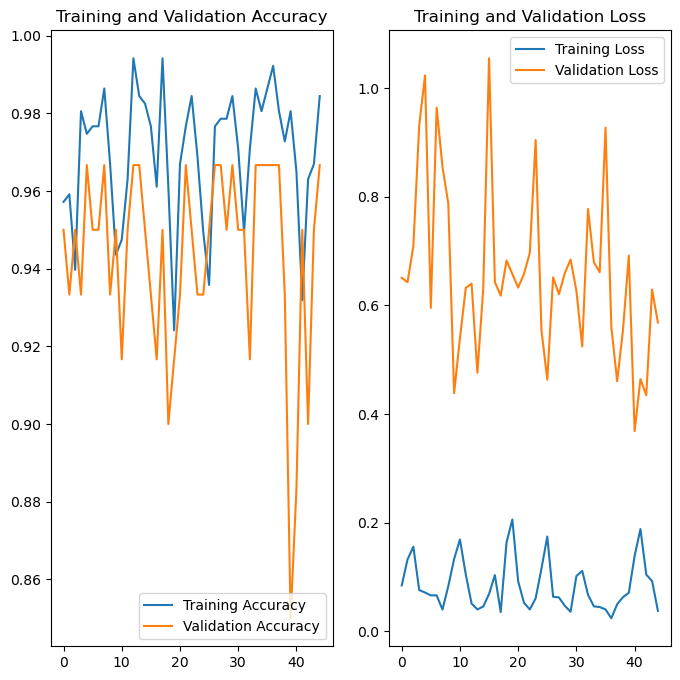

In [136]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

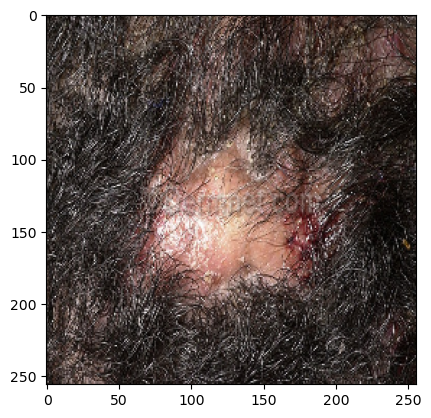

In [137]:
import numpy as np
for images_batch, label_batch in test_ds.take(1):
    plt.imshow(images_batch[2].numpy().astype('uint8'))

In [138]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 23ms/step


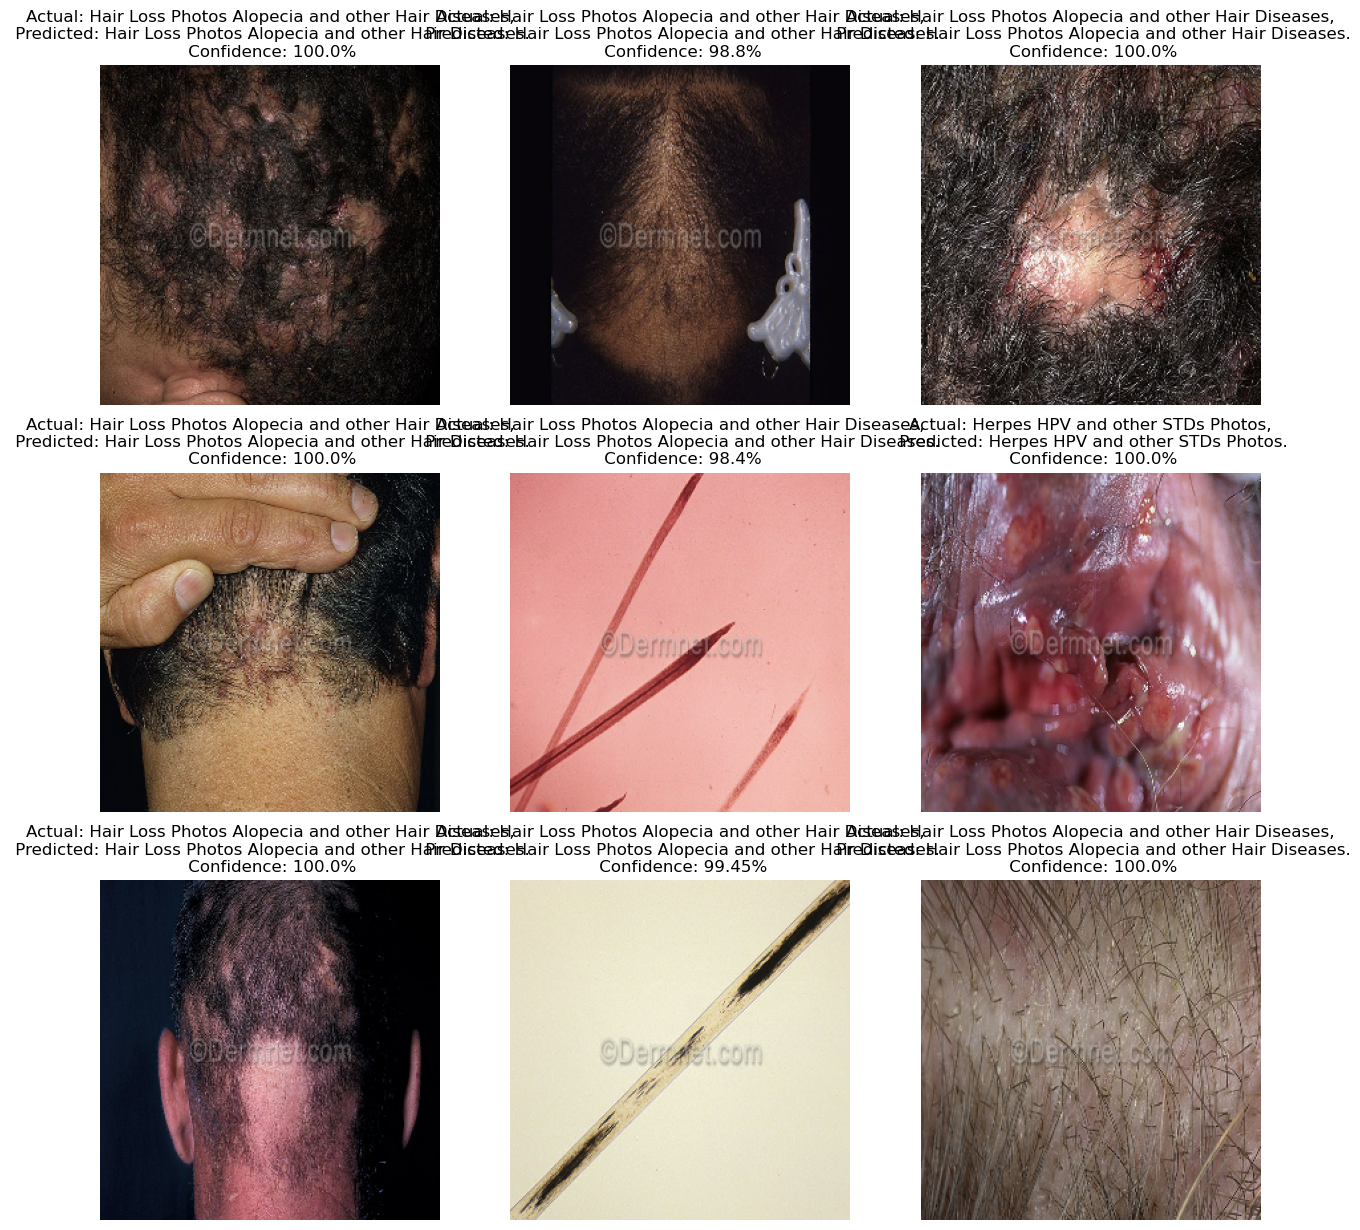

In [139]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax =plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis('off')

In [ ]:
model_version = 1
model.save(f"C:\Code\Skin_disease\training\saved_model")

In [ ]:
## getting confirmation
import os
[str(i) for i in os.listdir(f"C:\Code\Skin_disease\training\saved_model")]

In [ ]:
directory = f"C:\Code\Skin_disease\training\saved_model"
absolute_path = os.path.abspath(directory)
print(absolute_path)